In [3]:
from src.utils import plot_wav, get_path, load_audio_data, display_mfccs, save_data, load_dataset
from src.features import extract_mfccs

In [4]:
train_folder_path = get_path('data', 'train_audio_files_8k')
test_folder_path = get_path('data', 'public_test_audio_files_8k')

In [5]:
%%time
audio_data_train_list = load_audio_data(train_folder_path)

Wall time: 4min 29s


In [6]:
%%time
audio_data_test_list = load_audio_data(test_folder_path)

Wall time: 1min 10s


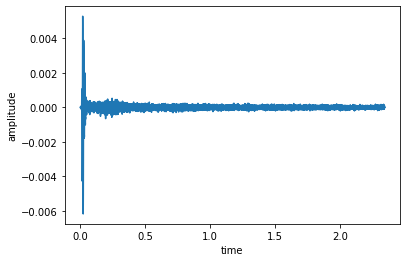

In [22]:
plot_wav(audio_data_list[0])

In [7]:
%%time
audio_data_train_list = extract_mfccs(audio_data_train_list)
#audio_data_test_list = extract_mfccs(audio_data_test_list)

TypeError: '>' not supported between instances of 'int' and 'NoneType'

In [8]:
%%time
#audio_data_train_list = extract_mfccs(audio_data_train_list)
audio_data_test_list = extract_mfccs(audio_data_test_list)

TypeError: '>' not supported between instances of 'int' and 'NoneType'

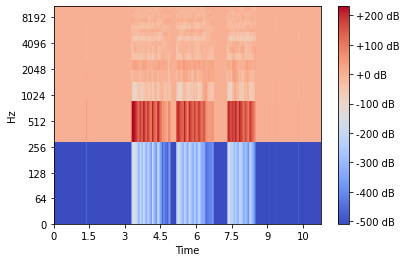

In [24]:
display_mfccs(audio_data_list[2])

In [9]:
save_data(get_path('data', 'npy', 'audio_data_train.npy'), audio_data_train_list)
save_data(get_path('data', 'npy', 'audio_data_test.npy'), audio_data_test_list)

In [10]:
import pandas as pd
data_train = pd.read_csv(get_path('data', 'metadata_train_challenge.csv'))
data_test = pd.read_csv(get_path('data', 'metadata_public_test.csv'))

In [11]:
from src.adapter import adapt_to_dataset

In [12]:
dataset_train = adapt_to_dataset(data_train, audio_data_train_list)
dataset_test = adapt_to_dataset(data_test, audio_data_test_list)

In [17]:
from src.preprocess import normalize_audio

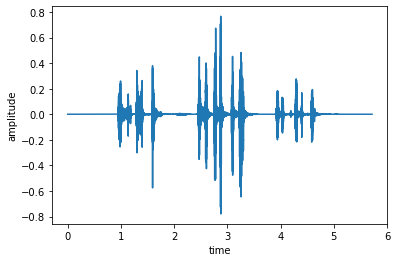

In [18]:
plot_wav(dataset.samples[0].audio_data)

In [1]:
# sample = normalize_audio(dataset.samples[0])

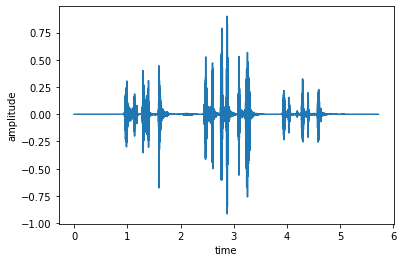

In [17]:
plot_wav(sample.audio_data)

In [13]:
save_data(get_path('data','npy', 'data_train.npy'), data_train)
save_data(get_path('data','npy', 'data_test.npy'), data_test)

In [17]:
# audio_data_list = load_audio_data(get_path('data', 'npy', 'audio_data.npy'), load_from_npy=True)
# dataset = load_dataset(get_path('data', 'npy', 'dataset.npy'))